In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

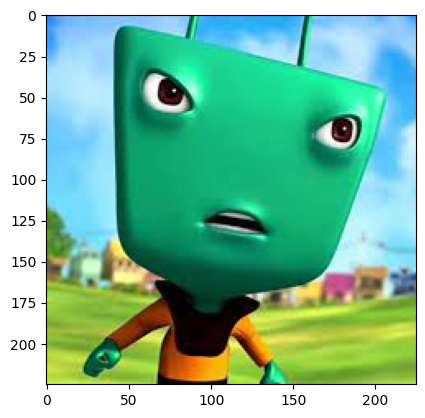

In [16]:
adudu = mpimg.imread('adudu.jpg')
plt.imshow(adudu)

In [ ]:
adudu = cv2.cvtColor(cv2.imread("adudu.jpg"), cv2.COLOR_BGR2GRAY)
def apply_kernel(image, kernel):
    kernel_size = len(kernel)
    offset = kernel_size // 2
    height, width = image.shape
    output = np.zeros_like(image)

    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            value = 0
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    value += image[y + ky - offset, x + kx - offset] * kernel[ky][kx]
            output[y, x] = min(max(int(value), 0), 255)
    return output

def mean_filter(image, kernel_size):
    kernel = [[1 / (kernel_size * kernel_size)] * kernel_size for _ in range(kernel_size)]
    return apply_kernel(image, kernel)

def median_filter(image, kernel_size):
    offset = kernel_size // 2
    height, width = image.shape
    output = np.zeros_like(image)

    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            values = []
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    values.append(image[y + ky - offset, x + kx - offset])
            output[y, x] = sorted(values)[len(values) // 2]
    return output

def modus_filter(image, kernel_size):
    offset = kernel_size // 2
    height, width = image.shape
    output = np.zeros_like(image)

    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            values = []
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    values.append(image[y + ky - offset, x + kx - offset])
            output[y, x] = max(set(values), key=values.count)
    return output

mean_3x3 = mean_filter(adudu, 3)
mean_9x9 = mean_filter(adudu, 9)
sharpened = apply_kernel(adudu, kernel_sharpened)
smoothed = apply_kernel(adudu, kernel_smoothing)
modus_3x3 = modus_filter(adudu, 3)
modus_9x9 = modus_filter(adudu, 9)
median_3x3 = median_filter(adudu, 3)
median_9x9 = median_filter(adudu, 9)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(mean_3x3, cmap='gray')
plt.title('Mean 3x3')

plt.subplot(2, 4, 2)
plt.imshow(mean_9x9, cmap='gray')
plt.title('Mean 9x9')

plt.subplot(2, 4, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpening')

plt.subplot(2, 4, 4)
plt.imshow(smoothed, cmap='gray')
plt.title('Smoothing')

plt.subplot(2, 4, 5)
plt.imshow(modus_3x3, cmap='gray')
plt.title('Modus 3x3')

plt.subplot(2, 4, 6)
plt.imshow(modus_9x9, cmap='gray')
plt.title('Modus 9x9')

plt.subplot(2, 4, 7)
plt.imshow(median_3x3, cmap='gray')
plt.title('Median 3x3')

plt.subplot(2, 4, 8)
plt.imshow(median_9x9, cmap='gray')
plt.title('Median 9x9')

plt.tight_layout()
plt.show()



OverflowError: Python integer -1 out of bounds for uint8